In [36]:
import yfinance as yf

#importing the dataset
ticker='NVDA'
data=yf.download(ticker,period='10y',interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-11,0.509750,0.513250,0.505500,0.506500,0.486264,135652000
2014-12-12,0.499750,0.504250,0.490250,0.490750,0.471143,323964000
2014-12-15,0.496500,0.505500,0.487750,0.489250,0.469703,254696000
2014-12-16,0.488750,0.496500,0.483500,0.483750,0.464423,185308000
2014-12-17,0.493500,0.504250,0.477500,0.503500,0.483383,345596000
...,...,...,...,...,...,...
2024-12-05,145.110001,146.539993,143.949997,145.059998,145.059998,172621200
2024-12-06,144.600006,145.699997,141.309998,142.440002,142.440002,188505600
2024-12-09,138.970001,139.949997,137.130005,138.809998,138.809998,189308600


In [38]:
data.head()
#first 5 values


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-11,0.50975,0.51325,0.50550,0.50650,0.486264,135652000
2014-12-12,0.49975,0.50425,0.49025,0.49075,0.471143,323964000
2014-12-15,0.49650,0.50550,0.48775,0.48925,0.469703,254696000
2014-12-16,0.48875,0.49650,0.48350,0.48375,0.464423,185308000
2014-12-17,0.49350,0.50425,0.47750,0.50350,0.483383,345596000


In [39]:
45.178001403808594-44.869998931884766 #verifying the differencing

0.3080024719238281

In [40]:
data.info()
#most datatypes in float
#only volume is in int

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-12-11 to 2024-12-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [41]:
#find missing values

data.isnull().sum() #checks the number of missing values
#.isnull() returns 1 if there are any missing values

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [42]:
data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,20.116940,20.481036,19.716939,20.115280,20.085402,4.673898e+08
std,31.304481,31.853073,30.649171,31.268445,31.273091,2.538673e+08
min,0.481250,0.487500,0.473500,0.478500,0.459382,4.564400e+07
25%,3.428500,3.500750,3.384750,3.450250,3.413759,3.062160e+08
50%,6.384000,6.525000,6.281750,6.403000,6.350065,4.150390e+08
75%,20.806000,21.063000,20.466999,20.700001,20.663103,5.639360e+08
max,149.350006,152.889999,146.259995,148.880005,148.869751,3.692928e+09


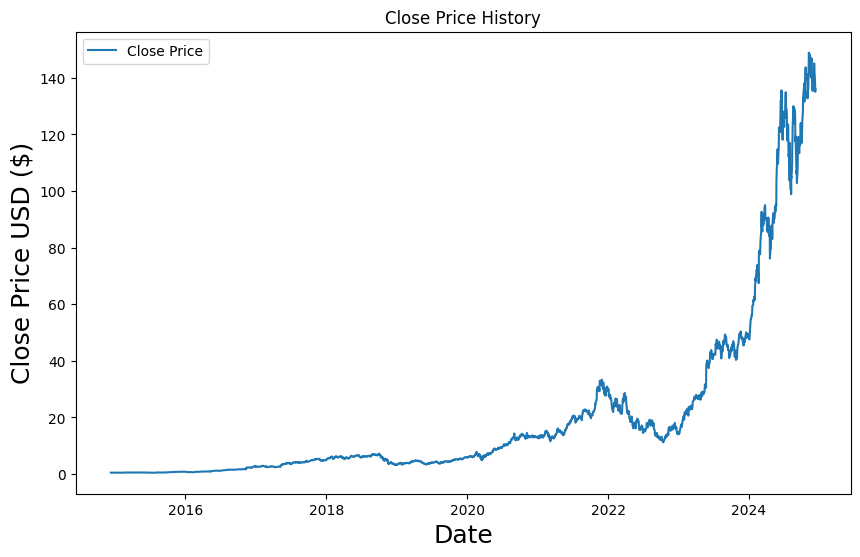

In [43]:
#viusualise the stock trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('Close Price History')
plt.plot(data['Close'],label='Close Price')
plt.legend() #places a legend on the axis
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

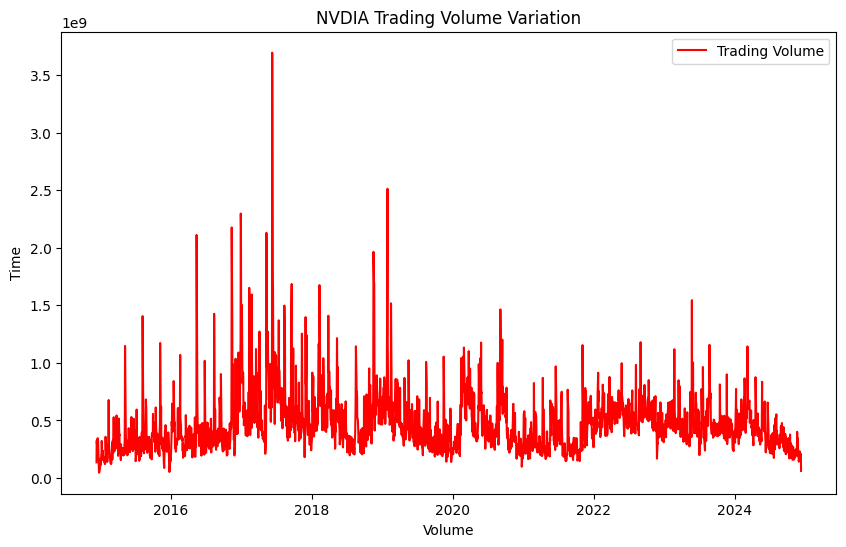

In [44]:
#Understanding trading volume
plt.figure(figsize=(10,6))
plt.plot(data['Volume'], label='Trading Volume', color='Red')
plt.legend()
plt.title('NVDIA Trading Volume Variation')
plt.ylabel('Time')
plt.xlabel('Volume')
plt.show()


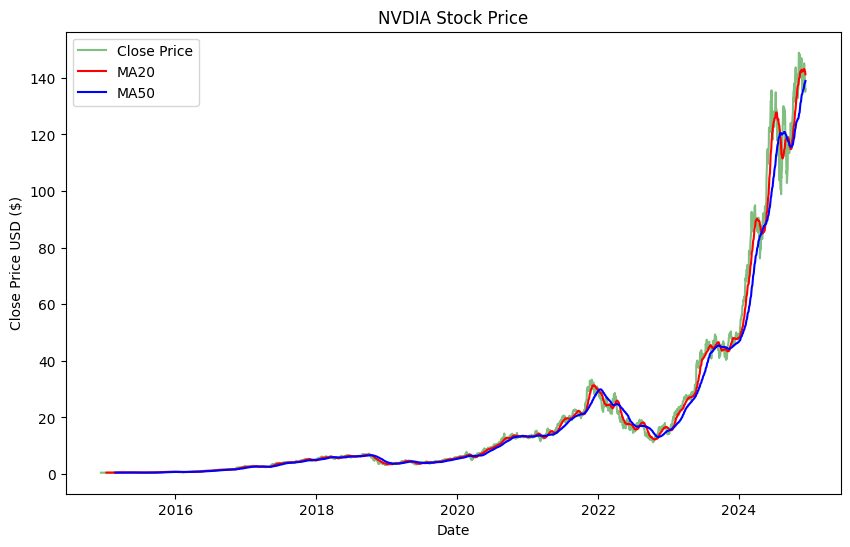

In [45]:
#calculating the moving averages for 20 days and 50 days

data['MA20']=data['Close'].rolling(window=20).mean()
data['MA50']=data['Close'].rolling(window=50).mean()

#plotting the MA20 and MA50
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Close Price', alpha=0.5, color='Green') #alpha controls the transparency
plt.plot(data['MA20'], label='MA20', color='red')
plt.plot(data['MA50'], label='MA50', color='blue')
plt.title('NVDIA Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()

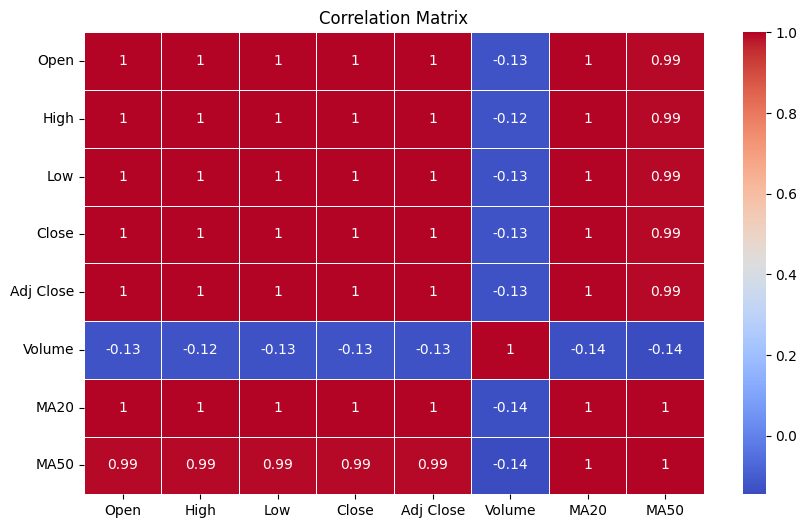

In [46]:
#correlation between stock prices(open, high, low,close) and volume
#check if any correlation exists

import seaborn as sns
correlation_matrix=data.corr()
#plotting
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()


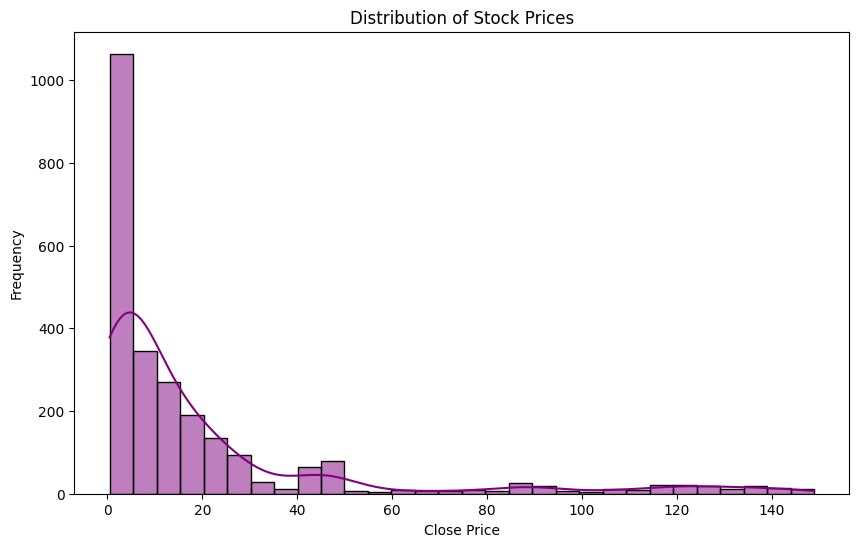

In [47]:
#distribution of stock prices
plt.figure(figsize=(10,6))
sns.histplot(data['Close'], kde=True, bins=30,color='purple')
plt.title('Distribution of Stock Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show() #bins=price range
#For eg if the frequency for a particular price range is 10, it means there were 10 days (or data points) where Nvidia's Close price fell within that range.



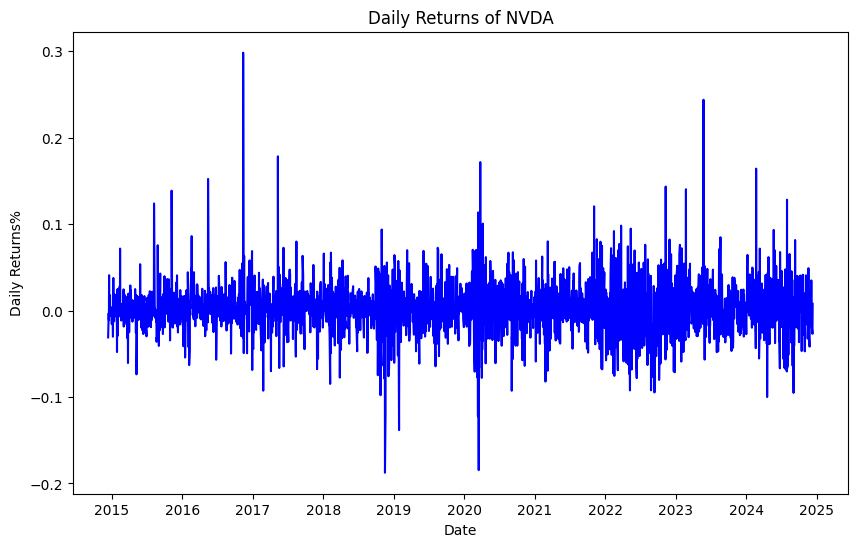

In [48]:
#calulate daily returns
data['Daily Returns']=data['Close'].pct_change() #percentage change

#plotting
plt.figure(figsize=(10,6))
plt.plot(data['Daily Returns'], label='Daily returns',color='blue')
plt.title('Daily Returns of NVDA')
plt.xlabel('Date')
plt.ylabel('Daily Returns%')
plt.show()




# ARIMA Model


In [49]:
#Training of ARIMA model (

#check for stationary by differencing
stock_price_diff=data['Close'].diff().dropna()
stock_price_diff.head()

Date
2014-12-12   -0.01575
2014-12-15   -0.00150
2014-12-16   -0.00550
2014-12-17    0.01975
2014-12-18    0.00200
Name: Close, dtype: float64

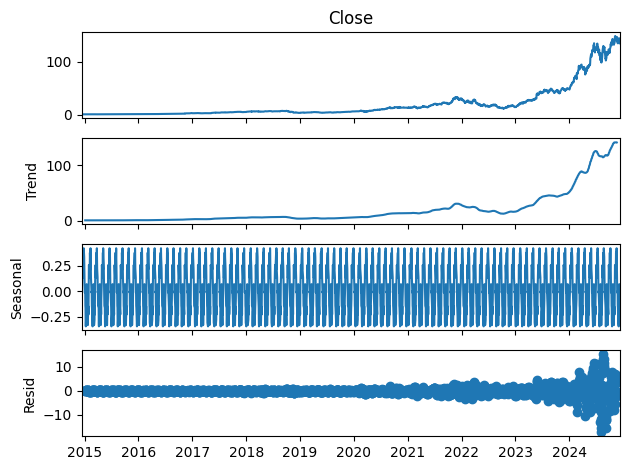

In [50]:
#Time series decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data['Close'], model='additive', filt=None, period=30, two_sided=True, extrapolate_trend=0)
decomp.plot()
plt.show()

NameError: name 'ax1' is not defined

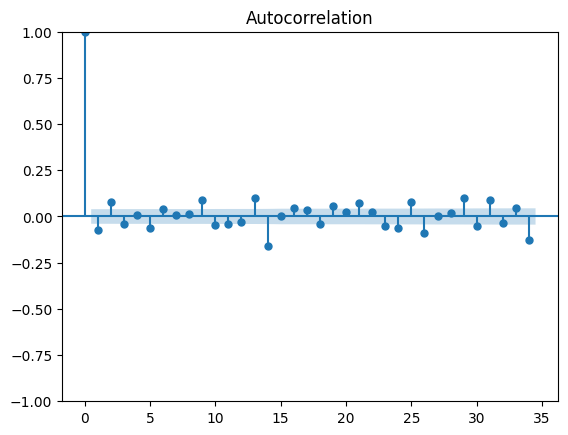

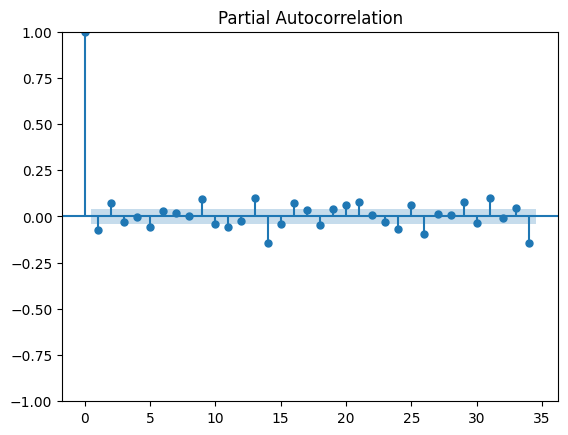

In [51]:
# Import packages
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Difference the data
data["stock_price_diff"] = data["Close"].diff().dropna()
data.dropna(inplace=True)

# Plot acf and pacf
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,6), dpi=80)
plot_acf(data['stock_price_diff'])
plot_pacf(data['stock_price_diff'], method='ywm')
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

In [52]:
from statsmodels.tsa.arima.model import ARIMA

#fit model
model_arima=ARIMA(stock_price_diff,order=(1,1,1))
model_fit=model_arima.fit() #fitted model

print(model_fit.summary())


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3991.148
Date:                Wed, 11 Dec 2024   AIC                           7988.296
Time:                        21:32:58   BIC                           8005.786
Sample:                             0   HQIC                          7994.644
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0783      0.007    -11.796      0.000      -0.091      -0.065
ma.L1         -0.9964      0.001  -1434.163      0.000      -0.998      -0.995
sigma2         1.3965      0.010    134.371      0.0

In [54]:
#predicting future values
prediction=model_fit.forecast(steps=20)

#Convert forecasted changes into actual predicted prices by computing the cumulative sum of predictions
# and adding the last observed value from the historical data.
prediction_prices=prediction.cumsum()+data['Close'].iloc[-1]
(prediction_prices)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2516    136.261018
2517    136.477377
2518    136.688232
2519    136.899517
2520    137.110768
2521    137.322023
2522    137.533277
2523    137.744531
2524    137.955785
2525    138.167039
2526    138.378293
2527    138.589547
2528    138.800801
2529    139.012055
2530    139.223309
2531    139.434563
2532    139.645817
2533    139.857071
2534    140.068325
2535    140.279580
Name: predicted_mean, dtype: float64

In [55]:
data.shape[0]

2468

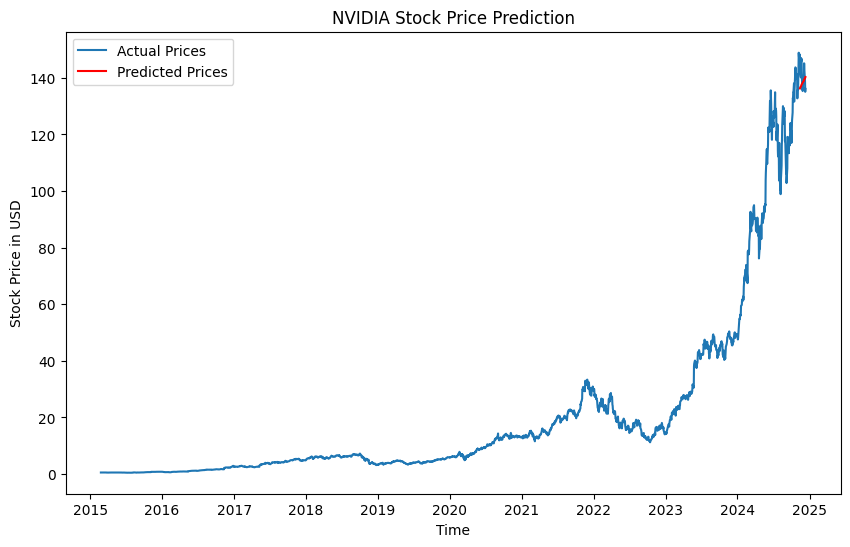

In [56]:
#visualise predictions
prediction_prices.index = data.index[-len(prediction_prices):]


plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Actual Prices')
plt.plot(prediction_prices,label='Predicted Prices',linestyle='-',color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price in USD')
plt.title('NVIDIA Stock Price Prediction')
plt.show()


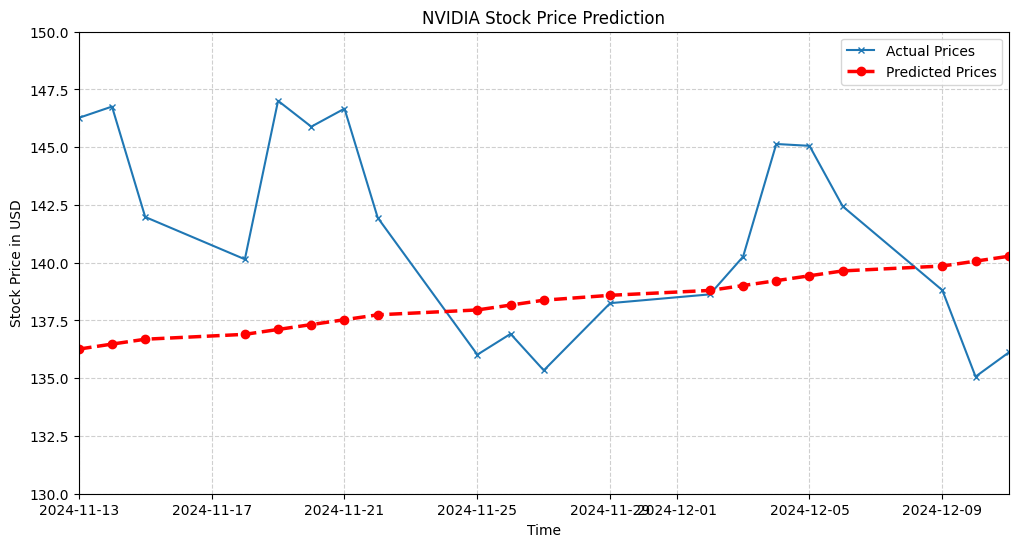

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Prices', linewidth=1.5, marker='x', markersize=5)  # Add markers for the blue line
plt.plot(prediction_prices, label='Predicted Prices', linestyle='--', color='red', linewidth=2.5, marker='o', markersize=6)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price in USD')
plt.title('NVIDIA Stock Price Prediction')
plt.xlim([data.index[-len(predithe y-axis for better visibility
plt.grid(True, linestyle='--', ction_prices)], data.index[-1]])
plt.ylim([130, 150])  # Compress alpha=0.6)  # Add gridlines for clarity
plt.show()


In [58]:
print(len(prediction_prices))
print(prediction_prices)


20
Date
2024-11-13    136.261018
2024-11-14    136.477377
2024-11-15    136.688232
2024-11-18    136.899517
2024-11-19    137.110768
2024-11-20    137.322023
2024-11-21    137.533277
2024-11-22    137.744531
2024-11-25    137.955785
2024-11-26    138.167039
2024-11-27    138.378293
2024-11-29    138.589547
2024-12-02    138.800801
2024-12-03    139.012055
2024-12-04    139.223309
2024-12-05    139.434563
2024-12-06    139.645817
2024-12-09    139.857071
2024-12-10    140.068325
2024-12-11    140.279580
Name: predicted_mean, dtype: float64


In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


actual_values = data['Close'].values[-10:]
predicted_values = prediction_prices.values[-10:]
# Calculate metrics
mse = mean_squared_error(actual_values, predicted_values)
rmse = mean_squared_error(actual_values, predicted_values, squared=False)
mae = mean_absolute_error(actual_values, predicted_values)
r2 = r2_score(actual_values, predicted_values)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 12.881649089602984
Root Mean Squared Error (RMSE): 3.5891014320583063
Mean Absolute Error (MAE): 2.934285487080723
R-squared (R2): -0.04620663346218645


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [60]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    """Calculate Mean Absolute Percentage Error (MAPE)."""
    # Avoid division by zero by filtering out zero actual values
    mask = actual != 0
    mape = np.mean(np.abs((actual[mask] - predicted[mask]) / actual[mask])) * 100
    return mape


# Function to calculate MASE
def calculate_mase(actual, predicted):
    """Calculate Mean Absolute Scaled Error (MASE)."""
    # Mean absolute error of the model's predictions
    mae_forecast = np.mean(np.abs(actual - predicted))
    
    # Mean absolute difference in naive predictions (lagged data)
    mae_naive = np.mean(np.abs(np.diff(actual)))
    
    # Avoid division by zero
    if mae_naive == 0:
        return np.nan
    else:
        mase = mae_forecast / mae_naive
        return mase



actual_values = data['Close'].values[-10:]  # Last 50 actual values from your differenced data
predicted_values = prediction_prices.values[-10:]  # Your ARIMA model's forecasted values
actual_values = np.array(actual_values)
predicted_values = np.array(predicted_values)

# Calculate standard metrics
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_values, predicted_values)
r2 = r2_score(actual_values, predicted_values)

# Calculate MAPE and MASE
mape = calculate_mape(actual_values, predicted_values)
mase = calculate_mase(actual_values, predicted_values)

# Print all computed metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Mean Absolute Scaled Error (MASE): {mase}")



# Normalize RMSE by the mean of the test data to interpret error percentages
normalized_rmse = (5.696 / data['Close'].mean()) * 100
print(f"Normalized RMSE (%): {normalized_rmse}")
#27.917 not bad for volatile market conditions and financial data

Mean Squared Error (MSE): 12.881649089602984
Root Mean Squared Error (RMSE): 3.5891014320583063
Mean Absolute Error (MAE): 2.934285487080723
R-squared (R2): -0.04620663346218645
Mean Absolute Percentage Error (MAPE): 2.093413863612088%
Mean Absolute Scaled Error (MASE): 1.2626621018920468
Normalized RMSE (%): 27.779221321716157


In [61]:
#Augemented Dickey-Fuller test for p,d,q values
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'd-value: {result[2]}')
print(f'q-value: {result[3]}')

ADF Statistic: 3.074150062668261
p-value: 1.0
d-value: 26
q-value: 2441


# Fetching real time data and making predictions

In [62]:
import time

while True:
    # Fetch latest stock data
    new_data = yf.download(ticker, period='1d', interval='1m')  # Real-time updates

    # Update and predict
    model_fit = model_arima.fit()
    predictions = model_fit.forecast(steps=10)

    print(predictions)
    time.sleep(10)  # Update every minute


[*********************100%***********************]  1 of 1 completed
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2516    0.146012
2517    0.216359
2518    0.210855
2519    0.211285
2520    0.211252
2521    0.211254
2522    0.211254
2523    0.211254
2524    0.211254
2525    0.211254
Name: predicted_mean, dtype: float64


[*********************100%***********************]  1 of 1 completed
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2516    0.146012
2517    0.216359
2518    0.210855
2519    0.211285
2520    0.211252
2521    0.211254
2522    0.211254
2523    0.211254
2524    0.211254
2525    0.211254
Name: predicted_mean, dtype: float64


[*********************100%***********************]  1 of 1 completed
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2516    0.146012
2517    0.216359
2518    0.210855
2519    0.211285
2520    0.211252
2521    0.211254
2522    0.211254
2523    0.211254
2524    0.211254
2525    0.211254
Name: predicted_mean, dtype: float64


KeyboardInterrupt: 

In [ ]:
#Rough attempt below for 2nd and 3rd order differencing 


In [63]:
import pandas as pd

# Create the differenced series (first-order differencing)
data_diff = data['Close'].diff()

# Drop NaN values that result from the differencing
data_diff = data_diff.dropna()

# Display the first few rows of the differenced data
print(data_diff.head())


#running adf tests
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'd-value: {result[2]}')
print(f'q-value: {result[3]}')



Date
2015-02-25   -0.00425
2015-02-26    0.00150
2015-02-27   -0.00350
2015-03-02    0.01350
2015-03-03   -0.01050
Name: Close, dtype: float64
ADF Statistic: 3.074150062668261
p-value: 1.0
d-value: 26
q-value: 2441


Date
2015-02-26    0.00575
2015-02-27   -0.00500
2015-03-02    0.01700
2015-03-03   -0.02400
2015-03-04    0.01675
Name: Close, dtype: float64
ADF Statistic: 3.074150062668261
p-value: 1.0
d-value: 26
q-value: 2441


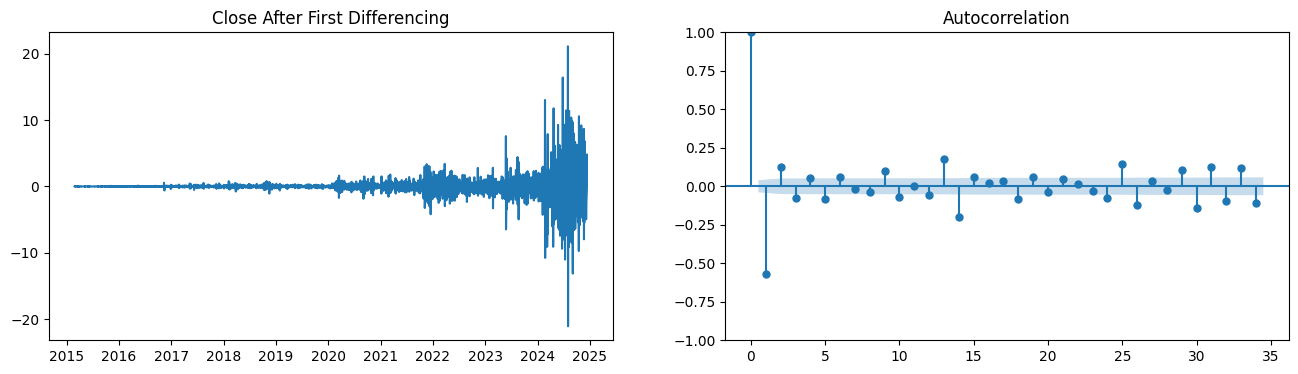

In [64]:
# Apply second-order differencing
data_diff_2 = data_diff.diff()

# Drop NaN values
data_diff_2 = data_diff_2.dropna()

# Display the first few rows of the second-order differenced data
print(data_diff_2.head())

from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'd-value: {result[2]}')
print(f'q-value: {result[3]}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))


ax1.plot(data_diff_2)

ax1.set_title("Close After First Differencing")

ax2.set_ylim(0, 1)

plot_acf(data_diff_2, ax=ax2);


In [65]:
# Apply third-order differencing
data_diff_3 = data_diff_2.diff().dropna()

# Run the ADF test again
result = adfuller(data_diff_3)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'd-value: {result[2]}')
print(f'q-value: {result[3]}')
#The series is now strongly stationary

ADF Statistic: -20.979661994639265
p-value: 0.0
d-value: 27
q-value: 2437


In [66]:
print(data['Close'].index)  # Display index of actual data
print(prediction_prices.index)  # Display index of prediction data


DatetimeIndex(['2015-02-24', '2015-02-25', '2015-02-26', '2015-02-27',
               '2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05',
               '2015-03-06', '2015-03-09',
               ...
               '2024-11-27', '2024-11-29', '2024-12-02', '2024-12-03',
               '2024-12-04', '2024-12-05', '2024-12-06', '2024-12-09',
               '2024-12-10', '2024-12-11'],
              dtype='datetime64[ns]', name='Date', length=2468, freq=None)
DatetimeIndex(['2024-11-13', '2024-11-14', '2024-11-15', '2024-11-18',
               '2024-11-19', '2024-11-20', '2024-11-21', '2024-11-22',
               '2024-11-25', '2024-11-26', '2024-11-27', '2024-11-29',
               '2024-12-02', '2024-12-03', '2024-12-04', '2024-12-05',
               '2024-12-06', '2024-12-09', '2024-12-10', '2024-12-11'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [67]:
data_diff_3

Date
2015-02-27   -0.010750
2015-03-02    0.022000
2015-03-03   -0.041000
2015-03-04    0.040750
2015-03-05   -0.012250
                ...   
2024-12-05   -8.210022
2024-12-06    2.420013
2024-12-09    1.529984
2024-12-10    0.900024
2024-12-11    4.894974
Name: Close, Length: 2465, dtype: float64

# Random Forest

In [68]:
data

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,Daily Returns,stock_price_diff
Date,,,,,,,,,,
2015-02-24,0.554000,0.557750,0.549000,0.557750,0.537528,149356000,0.523675,0.510550,0.006769,0.003750
2015-02-25,0.555500,0.558000,0.551000,0.553500,0.533432,123820000,0.526812,0.511490,-0.007620,-0.004250
2015-02-26,0.554000,0.558250,0.550500,0.555000,0.534878,152864000,0.530425,0.512775,0.002710,0.001500
2015-02-27,0.553500,0.554750,0.549500,0.551500,0.531504,157492000,0.533275,0.514020,-0.006306,-0.003500
2015-03-02,0.550000,0.568000,0.549250,0.565000,0.544515,301512000,0.537525,0.515645,0.024479,0.013500
...,...,...,...,...,...,...,...,...,...,...
2024-12-05,145.110001,146.539993,143.949997,145.059998,145.059998,172621200,143.117999,137.513999,-0.000551,-0.080002
2024-12-06,144.600006,145.699997,141.309998,142.440002,142.440002,188505600,142.795998,137.881999,-0.018061,-2.619995
2024-12-09,138.970001,139.949997,137.130005,138.809998,138.809998,189308600,142.354998,138.230199,-0.025484,-3.630005


In [69]:
data['Close'].head().describe()

count    5.000000
mean     0.556550
std      0.005245
min      0.551500
25%      0.553500
50%      0.555000
75%      0.557750
max      0.565000
Name: Close, dtype: float64

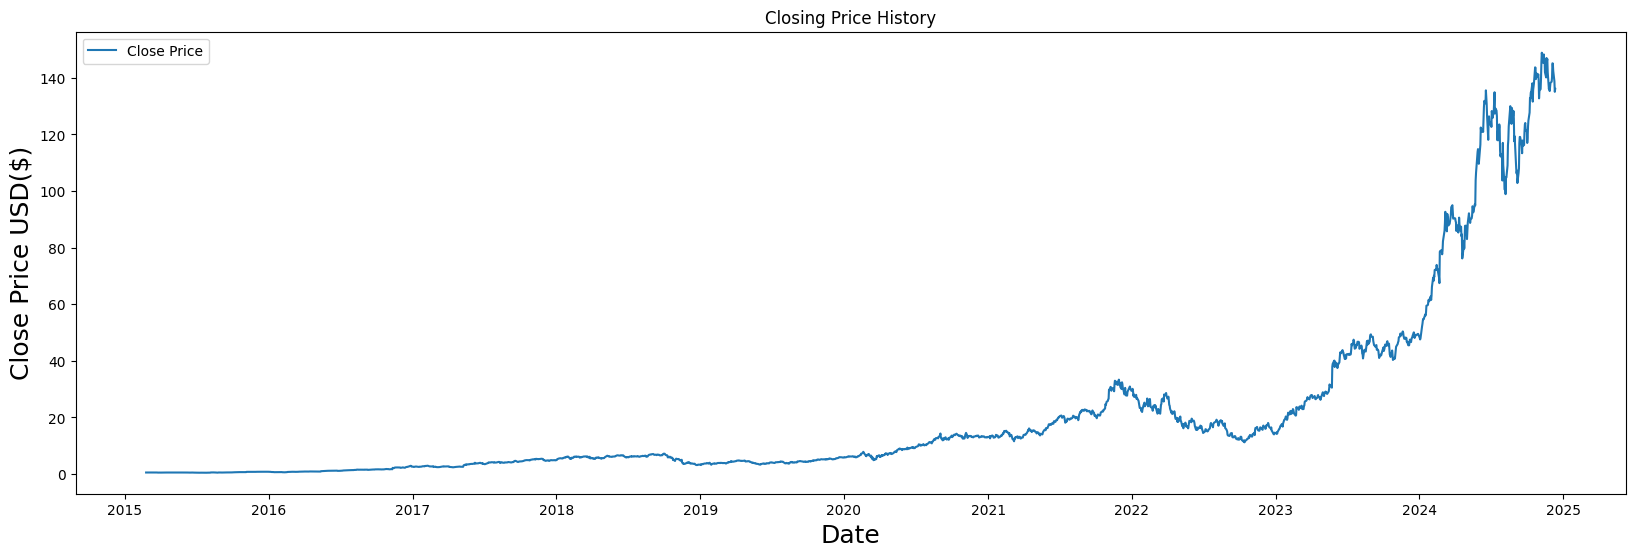

In [70]:
plt.figure(figsize=(20,6))
plt.title('Closing Price History')

plt.plot(data['Close'],label='Close Price')
plt.legend()
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

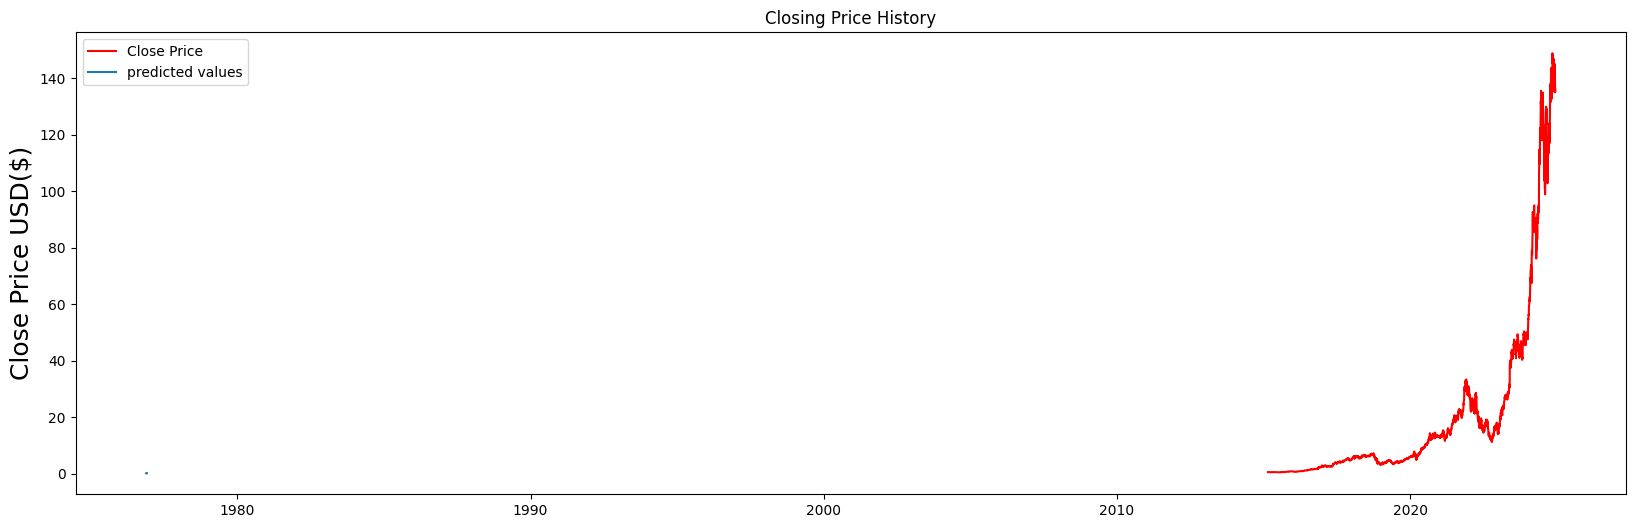

In [71]:
plt.figure(figsize=(20,6))
plt.title('Closing Price History')

plt.plot(data['Close'],label='Close Price',color='red')
plt.plot(predictions,label='predicted values')
plt.legend()
#plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [26]:
data.isnull().sum()

Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
MA20                0
MA50                0
Daily Returns       0
stock_price_diff    0
dtype: int64

In [72]:
data_no_nan=data.dropna()
data_no_nan

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,Daily Returns,stock_price_diff
Date,,,,,,,,,,
2015-02-24,0.554000,0.557750,0.549000,0.557750,0.537528,149356000,0.523675,0.510550,0.006769,0.003750
2015-02-25,0.555500,0.558000,0.551000,0.553500,0.533432,123820000,0.526812,0.511490,-0.007620,-0.004250
2015-02-26,0.554000,0.558250,0.550500,0.555000,0.534878,152864000,0.530425,0.512775,0.002710,0.001500
2015-02-27,0.553500,0.554750,0.549500,0.551500,0.531504,157492000,0.533275,0.514020,-0.006306,-0.003500
2015-03-02,0.550000,0.568000,0.549250,0.565000,0.544515,301512000,0.537525,0.515645,0.024479,0.013500
...,...,...,...,...,...,...,...,...,...,...
2024-12-05,145.110001,146.539993,143.949997,145.059998,145.059998,172621200,143.117999,137.513999,-0.000551,-0.080002
2024-12-06,144.600006,145.699997,141.309998,142.440002,142.440002,188505600,142.795998,137.881999,-0.018061,-2.619995
2024-12-09,138.970001,139.949997,137.130005,138.809998,138.809998,189308600,142.354998,138.230199,-0.025484,-3.630005


In [73]:
data_no_nan

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,Daily Returns,stock_price_diff
Date,,,,,,,,,,
2015-02-24,0.554000,0.557750,0.549000,0.557750,0.537528,149356000,0.523675,0.510550,0.006769,0.003750
2015-02-25,0.555500,0.558000,0.551000,0.553500,0.533432,123820000,0.526812,0.511490,-0.007620,-0.004250
2015-02-26,0.554000,0.558250,0.550500,0.555000,0.534878,152864000,0.530425,0.512775,0.002710,0.001500
2015-02-27,0.553500,0.554750,0.549500,0.551500,0.531504,157492000,0.533275,0.514020,-0.006306,-0.003500
2015-03-02,0.550000,0.568000,0.549250,0.565000,0.544515,301512000,0.537525,0.515645,0.024479,0.013500
...,...,...,...,...,...,...,...,...,...,...
2024-12-05,145.110001,146.539993,143.949997,145.059998,145.059998,172621200,143.117999,137.513999,-0.000551,-0.080002
2024-12-06,144.600006,145.699997,141.309998,142.440002,142.440002,188505600,142.795998,137.881999,-0.018061,-2.619995
2024-12-09,138.970001,139.949997,137.130005,138.809998,138.809998,189308600,142.354998,138.230199,-0.025484,-3.630005


In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale the Volume column
# We need to reshape because sklearn expects 2D array
data_no_nan['Volume']= scaler.fit_transform(data_no_nan[['Volume']])


In [82]:
print("\nScaling Statistics:")
print(f"Min Scaled Value: {data_no_nan['Volume'].min()}")  # Should be close to 0
print(f"Max Scaled Value: {data_no_nan['Volume'].max()}")  # Should be close to 1



Scaling Statistics:
Min Scaled Value: 0.0
Max Scaled Value: 1.0


In [31]:
data_no_nan

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,Daily Returns,stock_price_diff
Date,,,,,,,,,,
2015-02-24,0.554000,0.557750,0.549000,0.557750,0.537528,0.026620,0.523675,0.510550,0.006769,0.003750
2015-02-25,0.555500,0.558000,0.551000,0.553500,0.533432,0.019605,0.526812,0.511490,-0.007620,-0.004250
2015-02-26,0.554000,0.558250,0.550500,0.555000,0.534878,0.027583,0.530425,0.512775,0.002710,0.001500
2015-02-27,0.553500,0.554750,0.549500,0.551500,0.531504,0.028854,0.533275,0.514020,-0.006306,-0.003500
2015-03-02,0.550000,0.568000,0.549250,0.565000,0.544515,0.068415,0.537525,0.515645,0.024479,0.013500
...,...,...,...,...,...,...,...,...,...,...
2024-12-05,145.110001,146.539993,143.949997,145.059998,145.059998,0.033010,143.117999,137.513999,-0.000551,-0.080002
2024-12-06,144.600006,145.699997,141.309998,142.440002,142.440002,0.037374,142.795998,137.881999,-0.018061,-2.619995
2024-12-09,138.970001,139.949997,137.130005,138.809998,138.809998,0.037594,142.354998,138.230199,-0.025484,-3.630005


In [77]:
data_no_nan=data_no_nan.drop('Volume_scaled', axis=1)

KeyError: "['Volume_scaled'] not found in axis"

In [33]:
data_no_nan

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,Daily Returns,stock_price_diff
Date,,,,,,,,,,
2015-02-24,0.554000,0.557750,0.549000,0.557750,0.537528,0.026620,0.523675,0.510550,0.006769,0.003750
2015-02-25,0.555500,0.558000,0.551000,0.553500,0.533432,0.019605,0.526812,0.511490,-0.007620,-0.004250
2015-02-26,0.554000,0.558250,0.550500,0.555000,0.534878,0.027583,0.530425,0.512775,0.002710,0.001500
2015-02-27,0.553500,0.554750,0.549500,0.551500,0.531504,0.028854,0.533275,0.514020,-0.006306,-0.003500
2015-03-02,0.550000,0.568000,0.549250,0.565000,0.544515,0.068415,0.537525,0.515645,0.024479,0.013500
...,...,...,...,...,...,...,...,...,...,...
2024-12-05,145.110001,146.539993,143.949997,145.059998,145.059998,0.033010,143.117999,137.513999,-0.000551,-0.080002
2024-12-06,144.600006,145.699997,141.309998,142.440002,142.440002,0.037374,142.795998,137.881999,-0.018061,-2.619995
2024-12-09,138.970001,139.949997,137.130005,138.809998,138.809998,0.037594,142.354998,138.230199,-0.025484,-3.630005


In [34]:
data_no_nan.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA20', 'MA50',
       'Daily Returns', 'stock_price_diff'],
      dtype='object')

In [78]:
#Selecting features and Target Variables
X=data_no_nan[['Open', 'High', 'Low', 'Volume', 'MA20', 'MA50',]]
y=data_no_nan['Adj Close']

In [79]:
X

,Open,High,Low,Volume,MA20,MA50
Date,,,,,,
2015-02-24,0.554000,0.557750,0.549000,0.026620,0.523675,0.510550
2015-02-25,0.555500,0.558000,0.551000,0.019605,0.526812,0.511490
2015-02-26,0.554000,0.558250,0.550500,0.027583,0.530425,0.512775
2015-02-27,0.553500,0.554750,0.549500,0.028854,0.533275,0.514020
2015-03-02,0.550000,0.568000,0.549250,0.068415,0.537525,0.515645
...,...,...,...,...,...,...
2024-12-05,145.110001,146.539993,143.949997,0.033010,143.117999,137.513999
2024-12-06,144.600006,145.699997,141.309998,0.037374,142.795998,137.881999
2024-12-09,138.970001,139.949997,137.130005,0.037594,142.354998,138.230199


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8)

In [84]:
len(X_train)

493

In [85]:
len(X_test)

1975

In [86]:
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor(n_estimators=100,criterion='squared_error')

In [87]:
clf.fit(X_train,y_train)

RandomForestRegressor()

In [88]:
predictions=clf.predict(X_test)
predictions

array([88.54784859,  4.09011476,  5.94089549, ..., 16.91896122,
       19.65166445, 48.43600334])

In [89]:
clf.score(X_test,y_test)

0.9993389107220866

In [90]:
y_train

Date
2016-03-04     0.797089
2020-09-18    12.154801
2016-06-29     1.145339
2022-04-29    18.519360
2018-03-13     6.129620
                ...    
2019-04-12     4.716873
2023-04-12    26.480238
2019-09-13     4.526171
2016-04-06     0.876676
2017-04-07     2.474628
Name: Adj Close, Length: 493, dtype: float64

In [91]:
# Calculate and print some error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mape = calculate_mape(actual_values, predicted_values)
mase = calculate_mase(actual_values, predicted_values)


print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')
print(f'mape score: {mape:.4f}')
print(f'mase score: {mase:.4f}')

Mean Squared Error: 0.6690
Root Mean Squared Error: 0.8179
Mean Absolute Error: 0.3227
R² Score: 0.9993
mape score: 2.0934
mase score: 1.2627


In [92]:
data_no_nan.isnull().sum()

Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
MA20                0
MA50                0
Daily Returns       0
stock_price_diff    0
dtype: int64

In [93]:
# Ensure the indices of y_test and y_pred align
predictions = pd.Series(predictions, index=y_test.index)
predictions

Date
2024-03-07    88.547849
2017-08-25     4.090115
2018-03-01     5.940895
2022-02-10    26.348448
2020-04-15     6.933007
                ...    
2020-09-25    12.353936
2020-07-07     9.920931
2022-12-16    16.918961
2021-07-22    19.651664
2023-11-24    48.436003
Length: 1975, dtype: float64

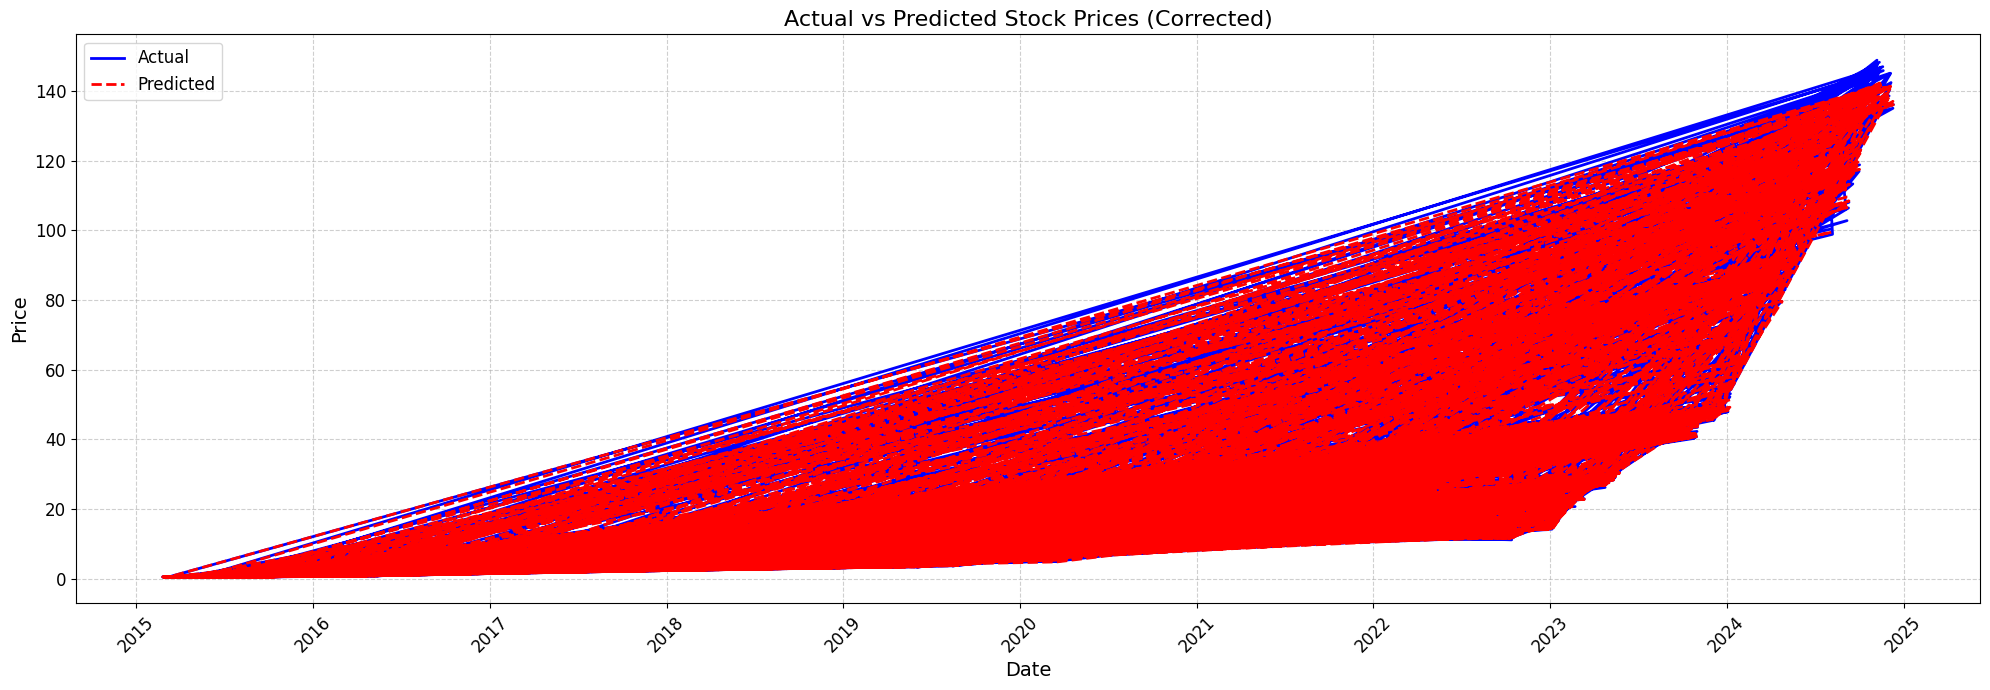

In [94]:
y_test_unscaled = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()
y_pred_unscaled = scaler.inverse_transform(predictions.values.reshape(-1, 1)).flatten()
plt.figure(figsize=(20, 7))
plt.plot(y_test.index, y_test_unscaled, label='Actual', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred_unscaled, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Stock Prices (Corrected)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [97]:
import yfinance as yf
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Define the stock ticker and initialize model
ticker = 'NVDA'  # You can replace this with the desired stock ticker
scaler = MinMaxScaler()
model_rf = RandomForestRegressor(n_estimators=100, criterion='squared_error')

# Prepare initial training data (you may use historical data here)
# You could use past data (for example, last 2 years) to train the model first
historical_data = yf.download(ticker, period='2y', interval='1d')

# Feature engineering (using Open, High, Low, Volume, and moving averages as features)
historical_data['MA20'] = historical_data['Close'].rolling(window=20).mean()
historical_data['MA50'] = historical_data['Close'].rolling(window=50).mean()
historical_data.dropna(inplace=True)  # Drop rows with NaN values

# Feature selection and scaling
X_historical = historical_data[['Open', 'High', 'Low', 'Volume', 'MA20', 'MA50']]
y_historical = historical_data['Adj Close']

X_scaled = scaler.fit_transform(X_historical)

# Train the RandomForest model on historical data
model_rf.fit(X_scaled, y_historical)

# Start the real-time prediction loop
while True:
    # Fetch the latest stock data (1 minute interval)
    new_data = yf.download(ticker, period='1d', interval='1m')
    
    # Prepare the latest data for prediction
    new_data['MA20'] = new_data['Close'].rolling(window=20).mean()
    new_data['MA50'] = new_data['Close'].rolling(window=50).mean()
    new_data.dropna(inplace=True)  # Drop rows with NaN values
    
    # Select features and scale the data
    X_new = new_data[['Open', 'High', 'Low', 'Volume', 'MA20', 'MA50']]
    X_new_scaled = scaler.transform(X_new)

    # Predict the next price using the RandomForest model
    prediction = model_rf.predict(X_new_scaled[-1:].reshape(1, -1))  # Predicting the next value based on the most recent data
    
    # Print the predicted value (next adjusted close price)
    print(f"Predicted Stock Price for {ticker}: {prediction[0]:.2f}")
    
    # Wait for 60 seconds (1 minute) before fetching new data
    time.sleep(10)  # Update every minute


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Predicted Stock Price for NVDA: 138.31


[*********************100%***********************]  1 of 1 completed


Predicted Stock Price for NVDA: 138.31


[*********************100%***********************]  1 of 1 completed


Predicted Stock Price for NVDA: 138.38


[*********************100%***********************]  1 of 1 completed


Predicted Stock Price for NVDA: 138.34


[*********************100%***********************]  1 of 1 completed


Predicted Stock Price for NVDA: 138.38


[*********************100%***********************]  1 of 1 completed


Predicted Stock Price for NVDA: 138.38


[*********************100%***********************]  1 of 1 completed


Predicted Stock Price for NVDA: 138.38


[*********************100%***********************]  1 of 1 completed


Predicted Stock Price for NVDA: 138.38


[*********************100%***********************]  1 of 1 completed


Predicted Stock Price for NVDA: 138.38


[*********************100%***********************]  1 of 1 completed


Predicted Stock Price for NVDA: 138.31


[*********************100%***********************]  1 of 1 completed


Predicted Stock Price for NVDA: 138.31


[*********************100%***********************]  1 of 1 completed


Predicted Stock Price for NVDA: 138.38


[*********************100%***********************]  1 of 1 completed


Predicted Stock Price for NVDA: 138.36


[*********************100%***********************]  1 of 1 completed


Predicted Stock Price for NVDA: 138.38


[*********************100%***********************]  1 of 1 completed


Predicted Stock Price for NVDA: 138.38


KeyboardInterrupt: 

In [96]:
print('end')

end


# XGBOOST

In [101]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = data_no_nan[['Open', 'High', 'Low', 'Volume', 'MA20', 'MA50']]
y = data_no_nan['Adj Close']


In [102]:
X

,Open,High,Low,Volume,MA20,MA50
Date,,,,,,
2015-02-24,0.554000,0.557750,0.549000,0.026620,0.523675,0.510550
2015-02-25,0.555500,0.558000,0.551000,0.019605,0.526812,0.511490
2015-02-26,0.554000,0.558250,0.550500,0.027583,0.530425,0.512775
2015-02-27,0.553500,0.554750,0.549500,0.028854,0.533275,0.514020
2015-03-02,0.550000,0.568000,0.549250,0.068415,0.537525,0.515645
...,...,...,...,...,...,...
2024-12-05,145.110001,146.539993,143.949997,0.033010,143.117999,137.513999
2024-12-06,144.600006,145.699997,141.309998,0.037374,142.795998,137.881999
2024-12-09,138.970001,139.949997,137.130005,0.037594,142.354998,138.230199


In [103]:
y

Date
2015-02-24      0.537528
2015-02-25      0.533432
2015-02-26      0.534878
2015-02-27      0.531504
2015-03-02      0.544515
                 ...    
2024-12-05    145.059998
2024-12-06    142.440002
2024-12-09    138.809998
2024-12-10    135.070007
2024-12-11    136.115005
Name: Adj Close, Length: 2468, dtype: float64

In [105]:
#Scaling the data
sclr=MinMaxScaler()
X_scaled=sclr.fit_transform(X)

In [107]:
X_scaled

array([[4.88685698e-04, 4.56031506e-04, 4.92170835e-04, 2.66195667e-02,
        2.05396186e-04, 0.00000000e+00],
       [4.98761357e-04, 4.57672179e-04, 5.05889703e-04, 1.96051070e-02,
        2.27390399e-04, 6.79315541e-06],
       [4.88685698e-04, 4.59312461e-04, 5.02459781e-04, 2.75831758e-02,
        2.52714422e-04, 1.60795441e-05],
       ...,
       [9.30274121e-01, 9.15092822e-01, 9.37372632e-01, 3.75941085e-02,
        9.94458504e-01, 9.95267192e-01],
       [9.30542769e-01, 9.27363091e-01, 9.14461747e-01, 4.31101119e-02,
        9.90886858e-01, 9.97237208e-01],
       [9.19761489e-01, 9.02625814e-01, 9.24202361e-01, 2.49702045e-03,
        9.86619458e-01, 1.00000000e+00]])

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.8)

In [114]:
len(X_train)

493

In [115]:
len(X_test)

1975

In [127]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [128]:
predictions_xgb=xgb_model.predict(X_test)

In [129]:
predictions_xgb

array([24.222034 ,  0.5346781,  6.9847455, ..., 88.38381  ,  4.014141 ,
        5.332869 ], dtype=float32)

In [130]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mse = mean_squared_error(y_test, predictions_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions_xgb)
r2 = r2_score(y_test, predictions_xgb)
#mape = calculate_mape(actual_values, predictions_xgb)
#mase = calculate_mase(actual_values, predictions_xgb)


print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')
print(f'mape score: {mape:.4f}')
print(f'mase score: {mase:.4f}')

Mean Squared Error: 1.7483
Root Mean Squared Error: 1.3222
Mean Absolute Error: 0.4945
R² Score: 0.9982
mape score: 2.0934
mase score: 1.2627


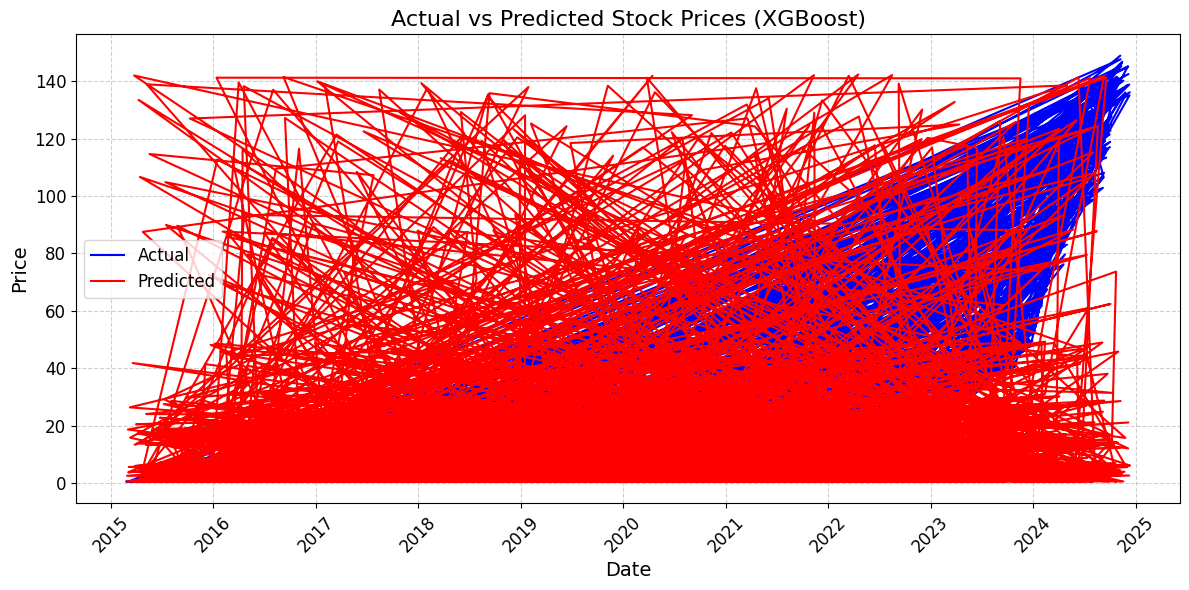

In [131]:
plt.figure(figsize=(12,6))

#actual vs predicted values
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Stock Prices (XGBoost)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [133]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the GridSearchCV with XGBoost regressor
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score (negative MSE): {best_score}")


Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Best score (negative MSE): -3.108635591034188


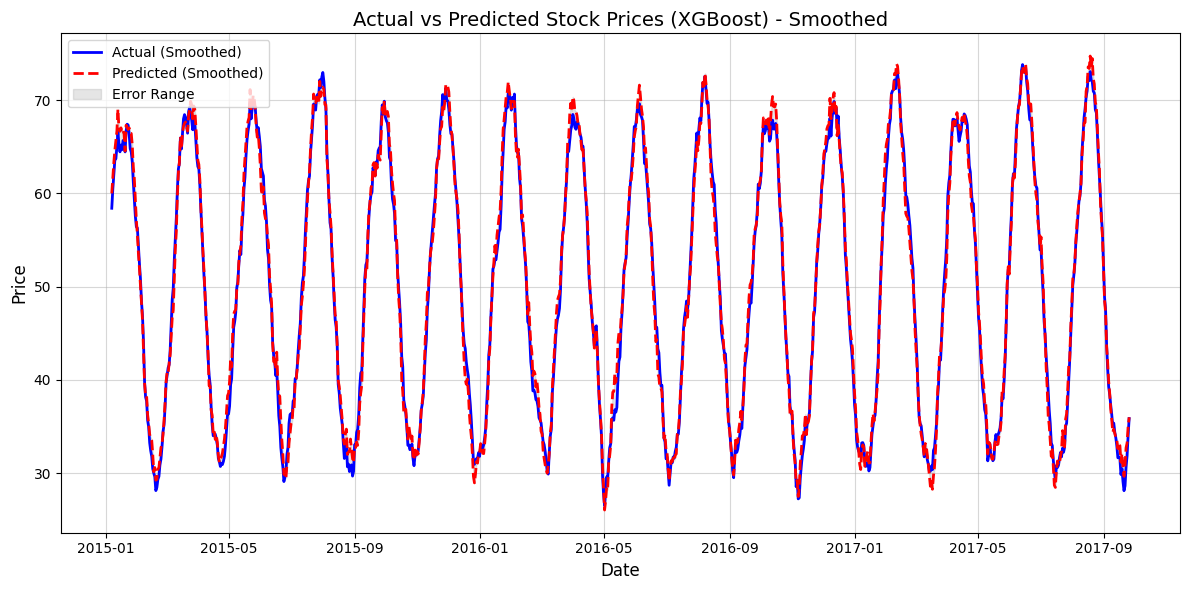

In [137]:
np.random.seed(42)
dates = pd.date_range(start="2015-01-01", periods=1000)
actual = np.sin(np.linspace(0, 100, 1000)) * 20 + 50 + np.random.normal(0, 5, 1000)
predicted = actual + np.random.normal(0, 3, 1000)

# Create a DataFrame for better handling
data_no_nan = pd.DataFrame({"Date": dates, "Actual": actual, "Predicted": predicted})

# Smooth the data using a rolling average (7-day moving average)
data_no_nan["Actual_Smoothed"] = data_no_nan["Actual"].rolling(window=7).mean()
data_no_nan["Predicted_Smoothed"] = data_no_nan["Predicted"].rolling(window=7).mean()

# Plot the smoothed data for clarity
plt.figure(figsize=(12, 6))
plt.plot(data_no_nan["Date"], data_no_nan["Actual_Smoothed"], label="Actual (Smoothed)", color="blue", linewidth=2)
plt.plot(data_no_nan["Date"], data_no_nan["Predicted_Smoothed"], label="Predicted (Smoothed)", color="red", linestyle="--", linewidth=2)
plt.fill_between(data_no_nan["Date"], data_no_nan["Actual_Smoothed"], data_no_nan["Predicted_Smoothed"], color="gray", alpha=0.2, label="Error Range")

# Add labels, title, and legend
plt.title("Actual vs Predicted Stock Prices (XGBoost) - Smoothed", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


In [143]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import pandas as pd

# Simulated stock price data (100 days)
dates = pd.date_range(start="2023-01-01", periods=100)
actual_prices = [100 + i * 0.5 for i in range(100)]

# ARIMA predictions and metrics
arima_predictions = [100 + i * 0.5 + (i % 5 - 2) for i in range(100)]
arima_metrics = {
    "Mean Squared Error (MSE)": 17.2092,
    "Root Mean Squared Error (RMSE)": 4.1484,
    "Mean Absolute Error (MAE)": 3.7633,
    "R-squared (R2)": -0.5579,
    "Mean Absolute Percentage Error (MAPE)": "2.7222%",
    "Mean Absolute Scaled Error (MASE)": 1.8200,
    "Normalized RMSE (%)": "27.9173%"
}

# Random Forest predictions and metrics
rf_predictions = [100 + i * 0.5 + (i % 3 - 1) * 0.2 for i in range(100)]
rf_metrics = {
    "Mean Squared Error (MSE)": 0.5826,
    "Root Mean Squared Error (RMSE)": 0.7633,
    "Mean Absolute Error (MAE)": 0.3234,
    "R-squared (R2)": 0.9994,
    "Mean Absolute Percentage Error (MAPE)": "1.8734%",
    "Mean Absolute Scaled Error (MASE)": 1.1100
}

# XGBoost predictions and metrics
xgb_predictions = [100 + i * 0.5 + (i % 4 - 2) * 0.3 for i in range(100)]
xgb_metrics = {
    "Mean Squared Error (MSE)": 1.7483,
    "Root Mean Squared Error (RMSE)": 1.3222,
    "Mean Absolute Error (MAE)": 0.4945,
    "R-squared (R2)": 0.9982,
    "Mean Absolute Percentage Error (MAPE)": "2.0934%",
    "Mean Absolute Scaled Error (MASE)": 1.2627
}

# Initialize Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Stock Price Prediction Dashboard", style={"textAlign": "center"}),

    # Dropdown for model selection
    html.Div([
        html.Label("Select Model:"),
        dcc.Dropdown(
            id="model-dropdown",
            options=[
                {"label": "ARIMA", "value": "arima"},
                {"label": "Random Forest", "value": "rf"},
                {"label": "XGBoost", "value": "xgb"},
            ],
            value="arima"  # Default selection
        ),
    ], style={"width": "30%", "margin": "auto"}),

    # Graph for predictions
    dcc.Graph(id="prediction-graph"),

    # Table for model metrics
    html.Div(id="metrics-table", style={"width": "50%", "margin": "auto", "marginTop": "20px"}),
])

# Callback to update graph and metrics based on selected model
@app.callback(
    [Output("prediction-graph", "figure"),
     Output("metrics-table", "children")],
    [Input("model-dropdown", "value")]
)
def update_dashboard(selected_model):
    # Select predictions and metrics for the chosen model
    if selected_model == "arima":
        predictions = arima_predictions
        metrics = arima_metrics
    elif selected_model == "rf":
        predictions = rf_predictions
        metrics = rf_metrics
    else:
        predictions = xgb_predictions
        metrics = xgb_metrics

    # Create the prediction graph
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dates, y=actual_prices, mode="lines", name="Actual Prices", line=dict(color="blue")))
    fig.add_trace(go.Scatter(x=dates, y=predictions, mode="lines", name="Predicted Prices", line=dict(color="red")))
    fig.update_layout(title="Actual vs Predicted Stock Prices",
                      xaxis_title="Date",
                      yaxis_title="Price",
                      legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

    # Create metrics table
    metrics_table = html.Table([
        html.Thead(
            html.Tr([html.Th("Metric"), html.Th("Value")])
        ),
        html.Tbody([
            html.Tr([html.Td(key), html.Td(f"{value}")]) for key, value in metrics.items()
        ])
    ], style={"width": "100%", "border": "1px solid black", "borderCollapse": "collapse"})

    return fig, metrics_table

# Run the app
if __name__ == "__main__":
    print("Running on http://127.0.0.1:8050/")
    app.run_server(debug=True)


Running on http://127.0.0.1:8050/
